# Trabalho Final - Análise de Dados com Python

Integrantes:

    1) Laura Munhoz Friozi
    2) Julio Cesar Falcon
    3) Julio Cesar Kenji
    4) Cristian Insfran

### Enunciado

A QuantumFinance possui um modelo de risco de crédito desatualizado, que tem concedido cartões para um número muito alto de mau pagadores e gerando problemas financeiros para a companhia.

O objetivo é realizar uma análise exploratória para compreender o comportamento dos dados e tentar descobrir um padrão que explique e diferencie clientes bons de maus pagadores.

Seu trabalho é:

1. Explorar e analisar os dados para entender a distribuição das características e a relação com a classificação de cada cliente.

2. Responder as seguintes perguntas:

    * 2.1 Como as features sexo, estado civil, quantidade de dependentes e nível educacional está relacionada com a variável meta? 
    * 2.2 Plote um gráfico que mostre a distribuição de bons e maus pagadores por estado. Escolha o gráfico que achar mais conveniente
    * 2.3 Use boxplot para explicar como o tipo de residência interfere na classificação do pagador
    * 2.4 Como as features renda pessoal mensal e outras rendas se relacionam com a variável meta? (obs: não é correlação estatística)
    * 2.5 A idade interfere na classificação do pagador?

#### Entregáveis:

Jupyter Notebook:  O notebook deverá estar bem organizado com seções claras e textos que facilitem a compreensão da análise e decisões tomadas e que permita a obtenção do resultado final a partir do dataset disponibilizado.


## Exploração de Dados

# 1. Explorar e analisar os dados para compreender a distribuição das características e a relação com a classificação de cada cliente. Como classificar os clientes?
RESPOSTA: Para facilitar a visualização e análise das variáveis, foi gerado um relatório utilizando a biblioteca Sweetviz, permitindo identificar padrões e tendências de forma intuitiva e eficiente.



In [112]:
#1 Explorar e analisar os dados para entender a distribuição das características e a relação com a classificação de cada cliente.  Como classificar os cliente? 
import pandas as pd
import sweetviz as sweetviz
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("credit.csv", encoding='unicode_escape', sep='\t', header=None)
df[51] = pd.to_numeric(df[51], errors='coerce')
df[52] = pd.to_numeric(df[52], errors='coerce')

df = df.dropna(subset=[51, 52])

# relatório
relatorio = sweetviz.analyze(df)
relatorio.show_html('RELATORIO_credito.html')

/var/folders/1_/71tpy68j3wd3jq9yqnrw15wm0000gn/T/ipykernel_6673/2418027436.py:7: DtypeWarning: Columns (51,52) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("credit.csv", encoding='unicode_escape', sep='\t', header=None)


                                             |          | [  0%]   00:00 -> (? left)

Report RELATORIO_credito.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


# 2.1 A análise das variáveis em relação à meta revela alguns padrões interessantes, com destaque para o sexo e a quantidade de dependentes. A seguir, as conclusões de cada uma dessas variáveis:

RESPOSTA: Os gráficos mostram a distribuição de bons e maus pagadores para as variáveis sexo, estado civil, número de dependentes e nível educacional. Com base neles, podemos começar a identificar padrões:

Sexo: A distribuição de bons e maus pagadores parece semelhante entre homens e mulheres, sugerindo que o gênero, por si só, não é um fator determinante para a inadimplência.

Estado Civil: Algumas categorias apresentam pequenas diferenças na proporção de maus pagadores, o que pode indicar que a situação conjugal influencia levemente o comportamento financeiro.

Número de Dependentes: O aumento no número de dependentes pode estar relacionado a um maior risco de inadimplência, possivelmente devido ao impacto financeiro de mais pessoas na renda familiar.

Nível Educacional: Parece haver uma relação entre escolaridade e inadimplência, com algumas categorias apresentando maior incidência de maus pagadores.

In [114]:
#2.1 Como as features sexo, estado civil, quantidade de dependentes e nível educacional está relacionada com a variável meta? 

# Mapeamento das colunas 
sexo = df[6]           # Coluna 7 sexo
estado_civil = df[7]   # Coluna 8 estado civil
dependentes = df[8]    # Coluna 9 quantidade de dependentes
nivel_educacional = df[9] # Coluna 10 nível educacional
meta = df[53]          # Coluna meta (Bom = 0, Mau = 1)

dados = pd.DataFrame({
    'Sexo': sexo,
    'Estado_Civil': estado_civil,
    'Dependentes': dependentes,
    'Nivel_Educacional': nivel_educacional,
    'Meta': meta
})





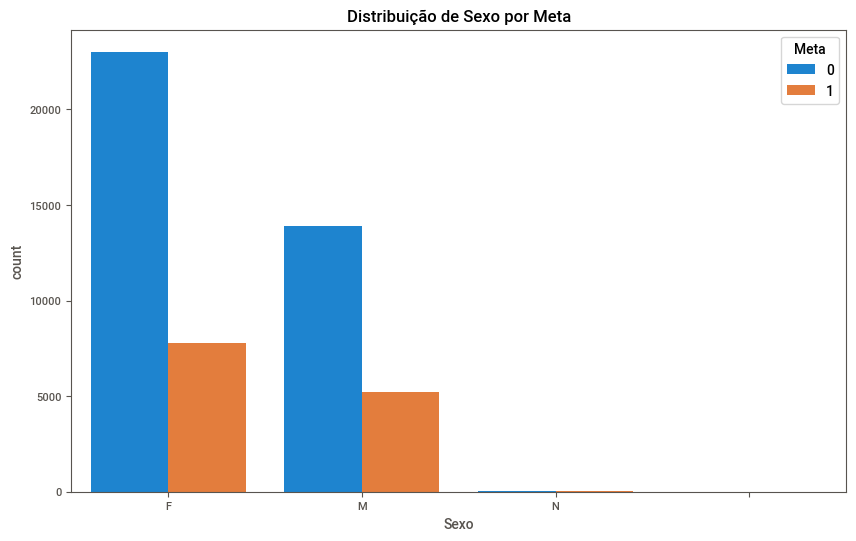

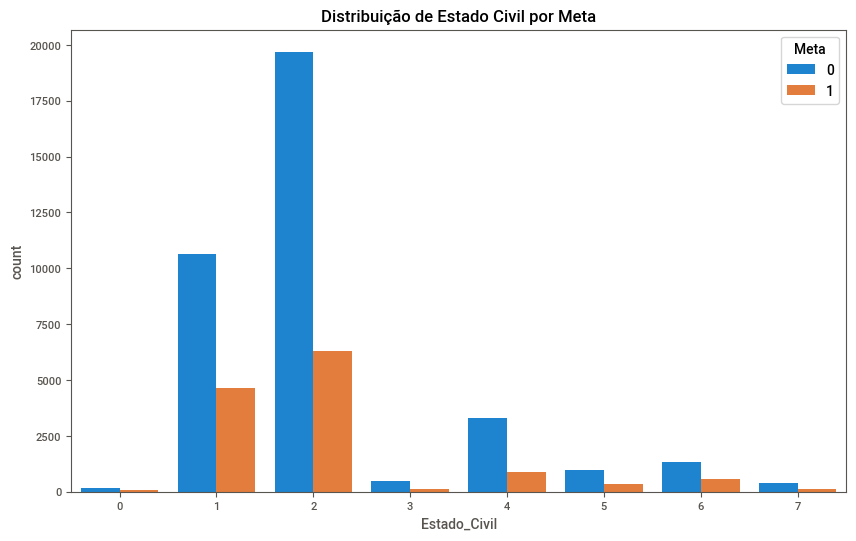

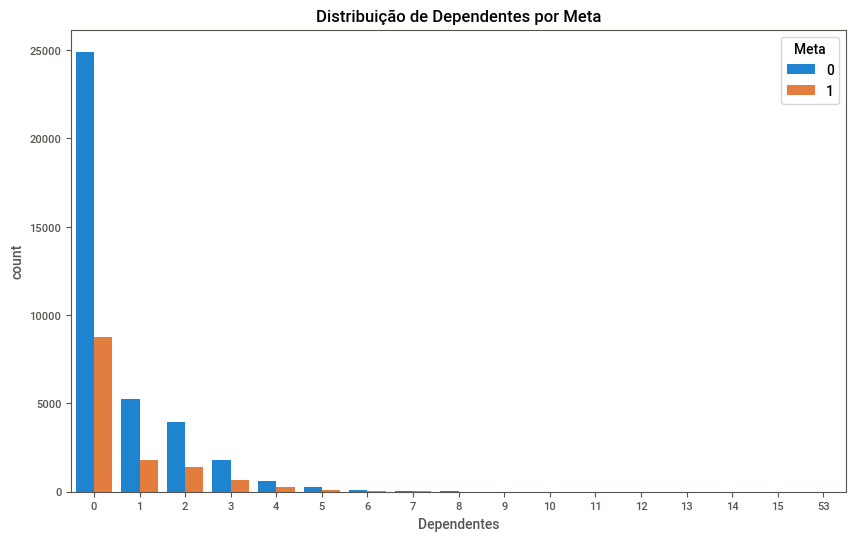

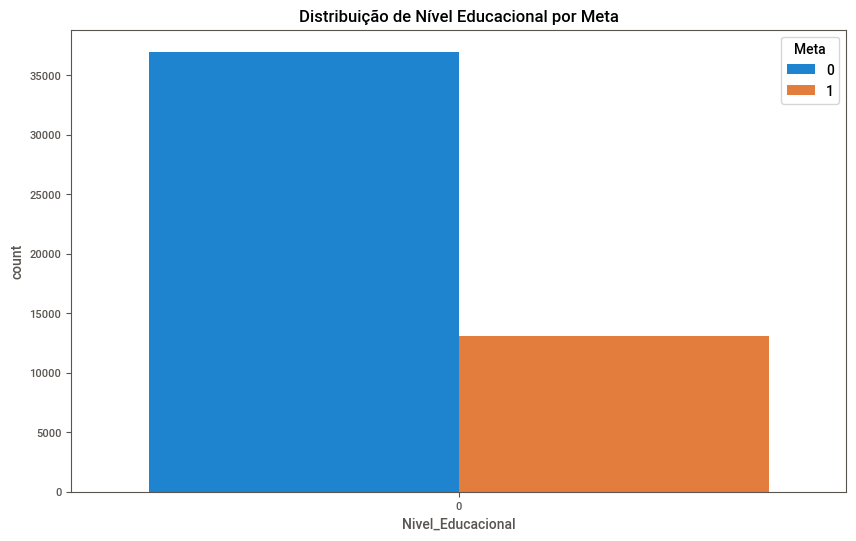

In [115]:
import seaborn as sns
import matplotlib.pyplot as plt

# Gráficos de barras
plt.figure(figsize=(10, 6))

# Sexo vs Meta
sns.countplot(data=dados, x='Sexo', hue='Meta')
plt.title('Distribuição de Sexo por Meta')
plt.show()

# Estado Civil vs Meta
plt.figure(figsize=(10, 6))
sns.countplot(data=dados, x='Estado_Civil', hue='Meta')
plt.title('Distribuição de Estado Civil por Meta')
plt.show()

# Dependentes vs Meta
plt.figure(figsize=(10, 6))
sns.countplot(data=dados, x='Dependentes', hue='Meta')
plt.title('Distribuição de Dependentes por Meta')
plt.show()

# Nível Educacional vs Meta
plt.figure(figsize=(10, 6))
sns.countplot(data=dados, x='Nivel_Educacional', hue='Meta')
plt.title('Distribuição de Nível Educacional por Meta')
plt.show()


# 2.2 Plote um gráfico que mostre a distribuição de bons e maus pagadores por estado. Escolha o gráfico que achar mais conveniente
RESPOSTA: Utilizamos dois graficos de barras empilhadas, um com valores e outro com porcentagens.  Apesar do estado de Sao Paulo ter 2287 maus pagadores, o estado de Sergipe tem o percetual maior 34%  de maus pagadores com maior inadimplencia.

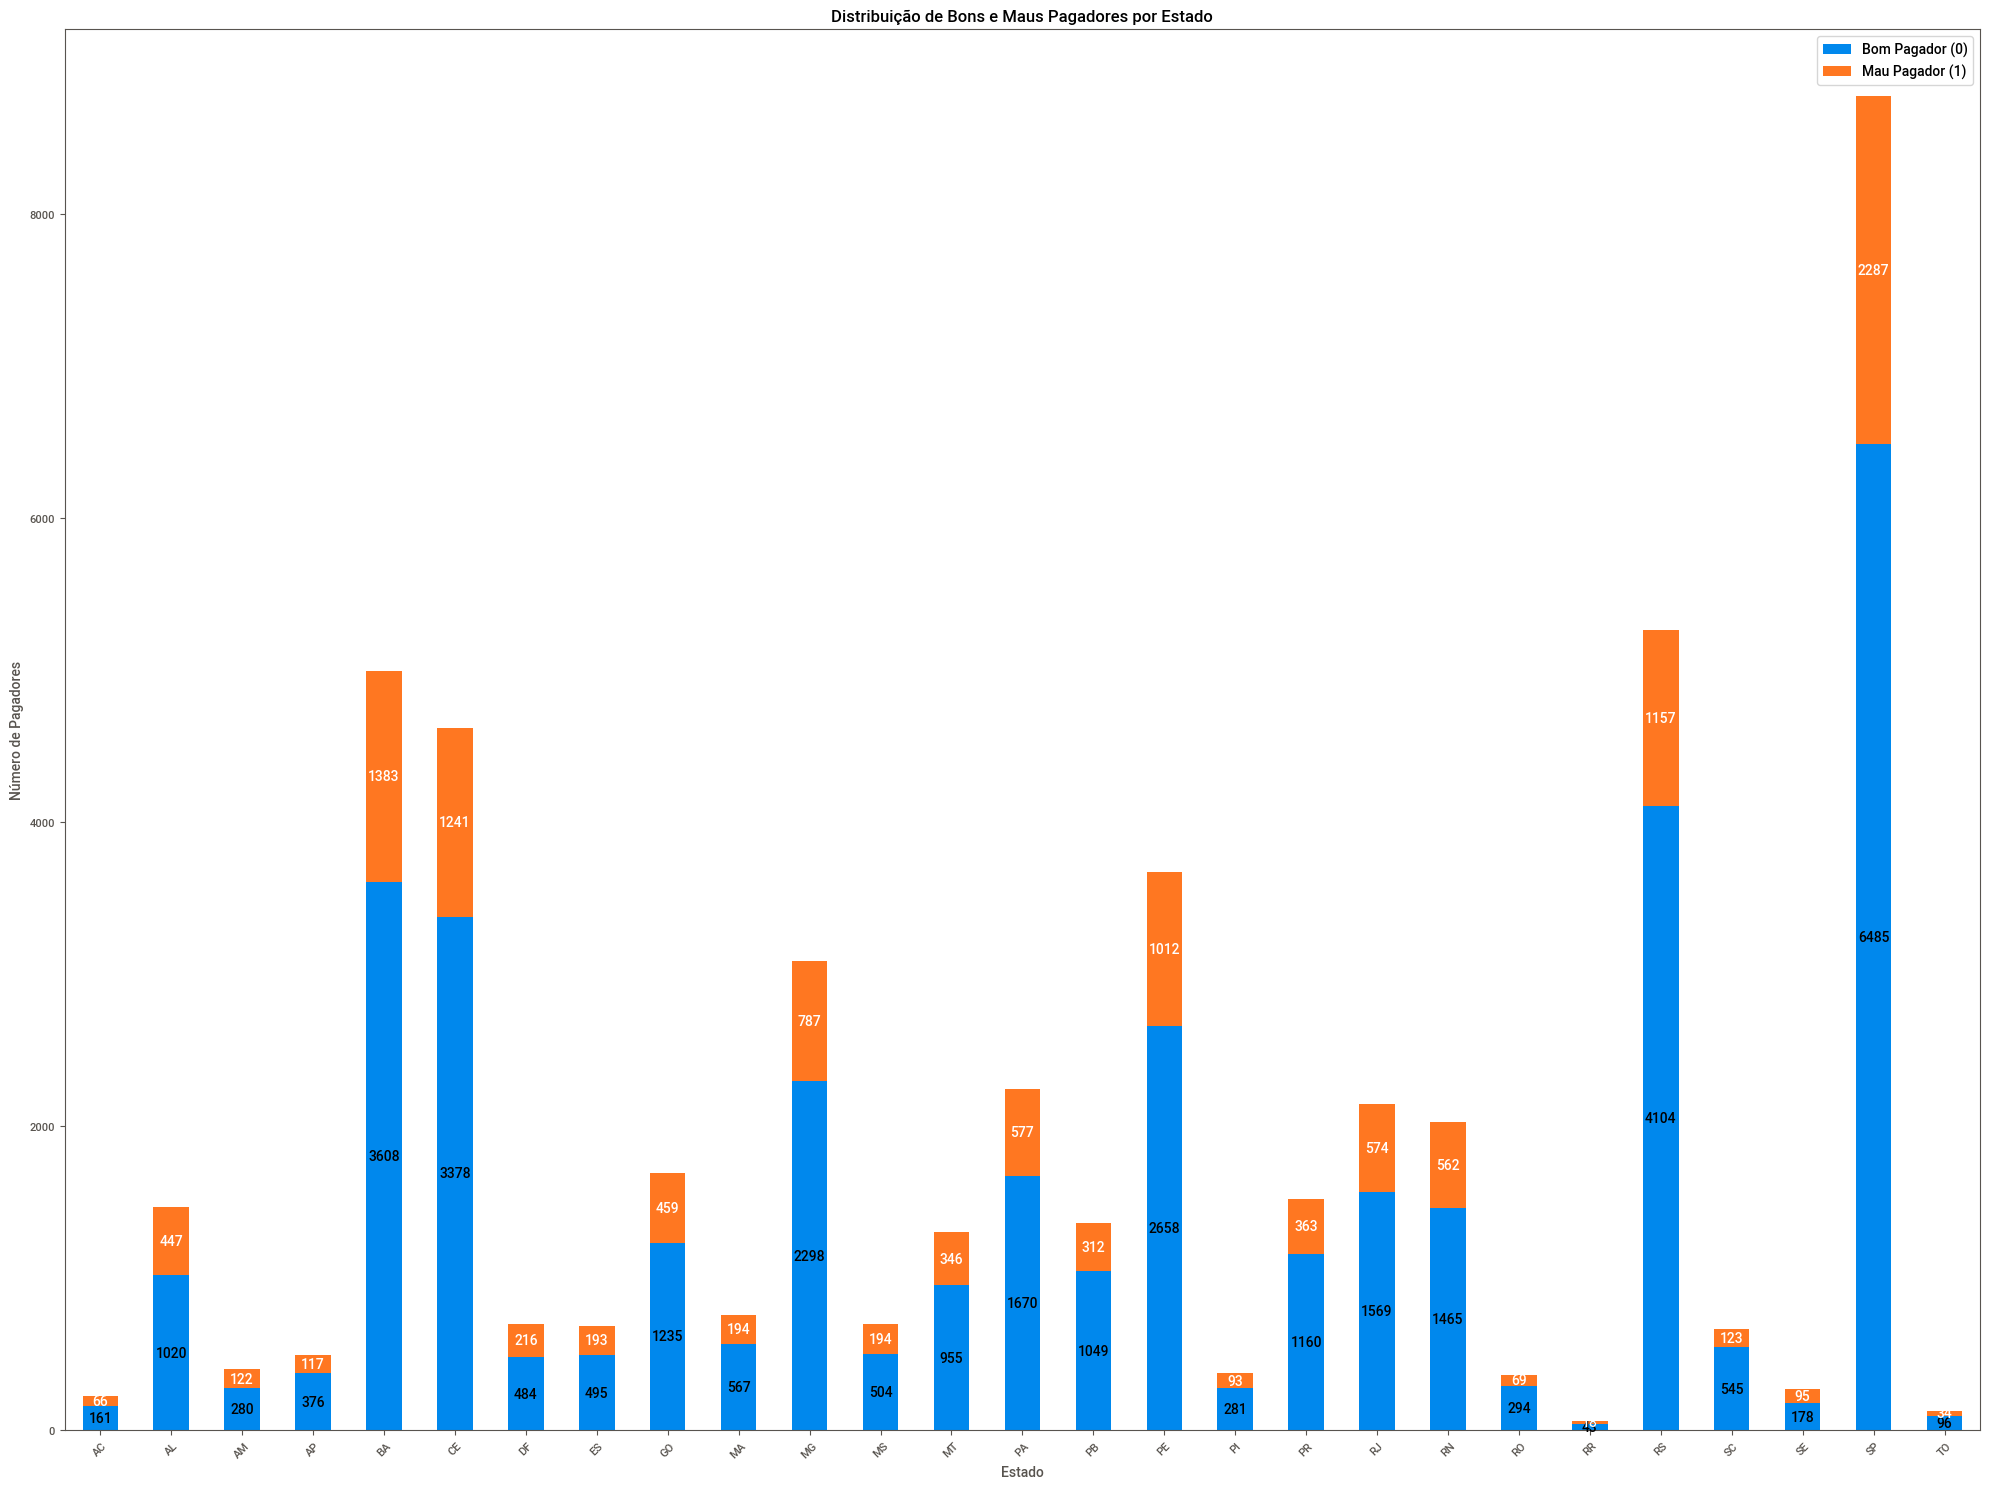

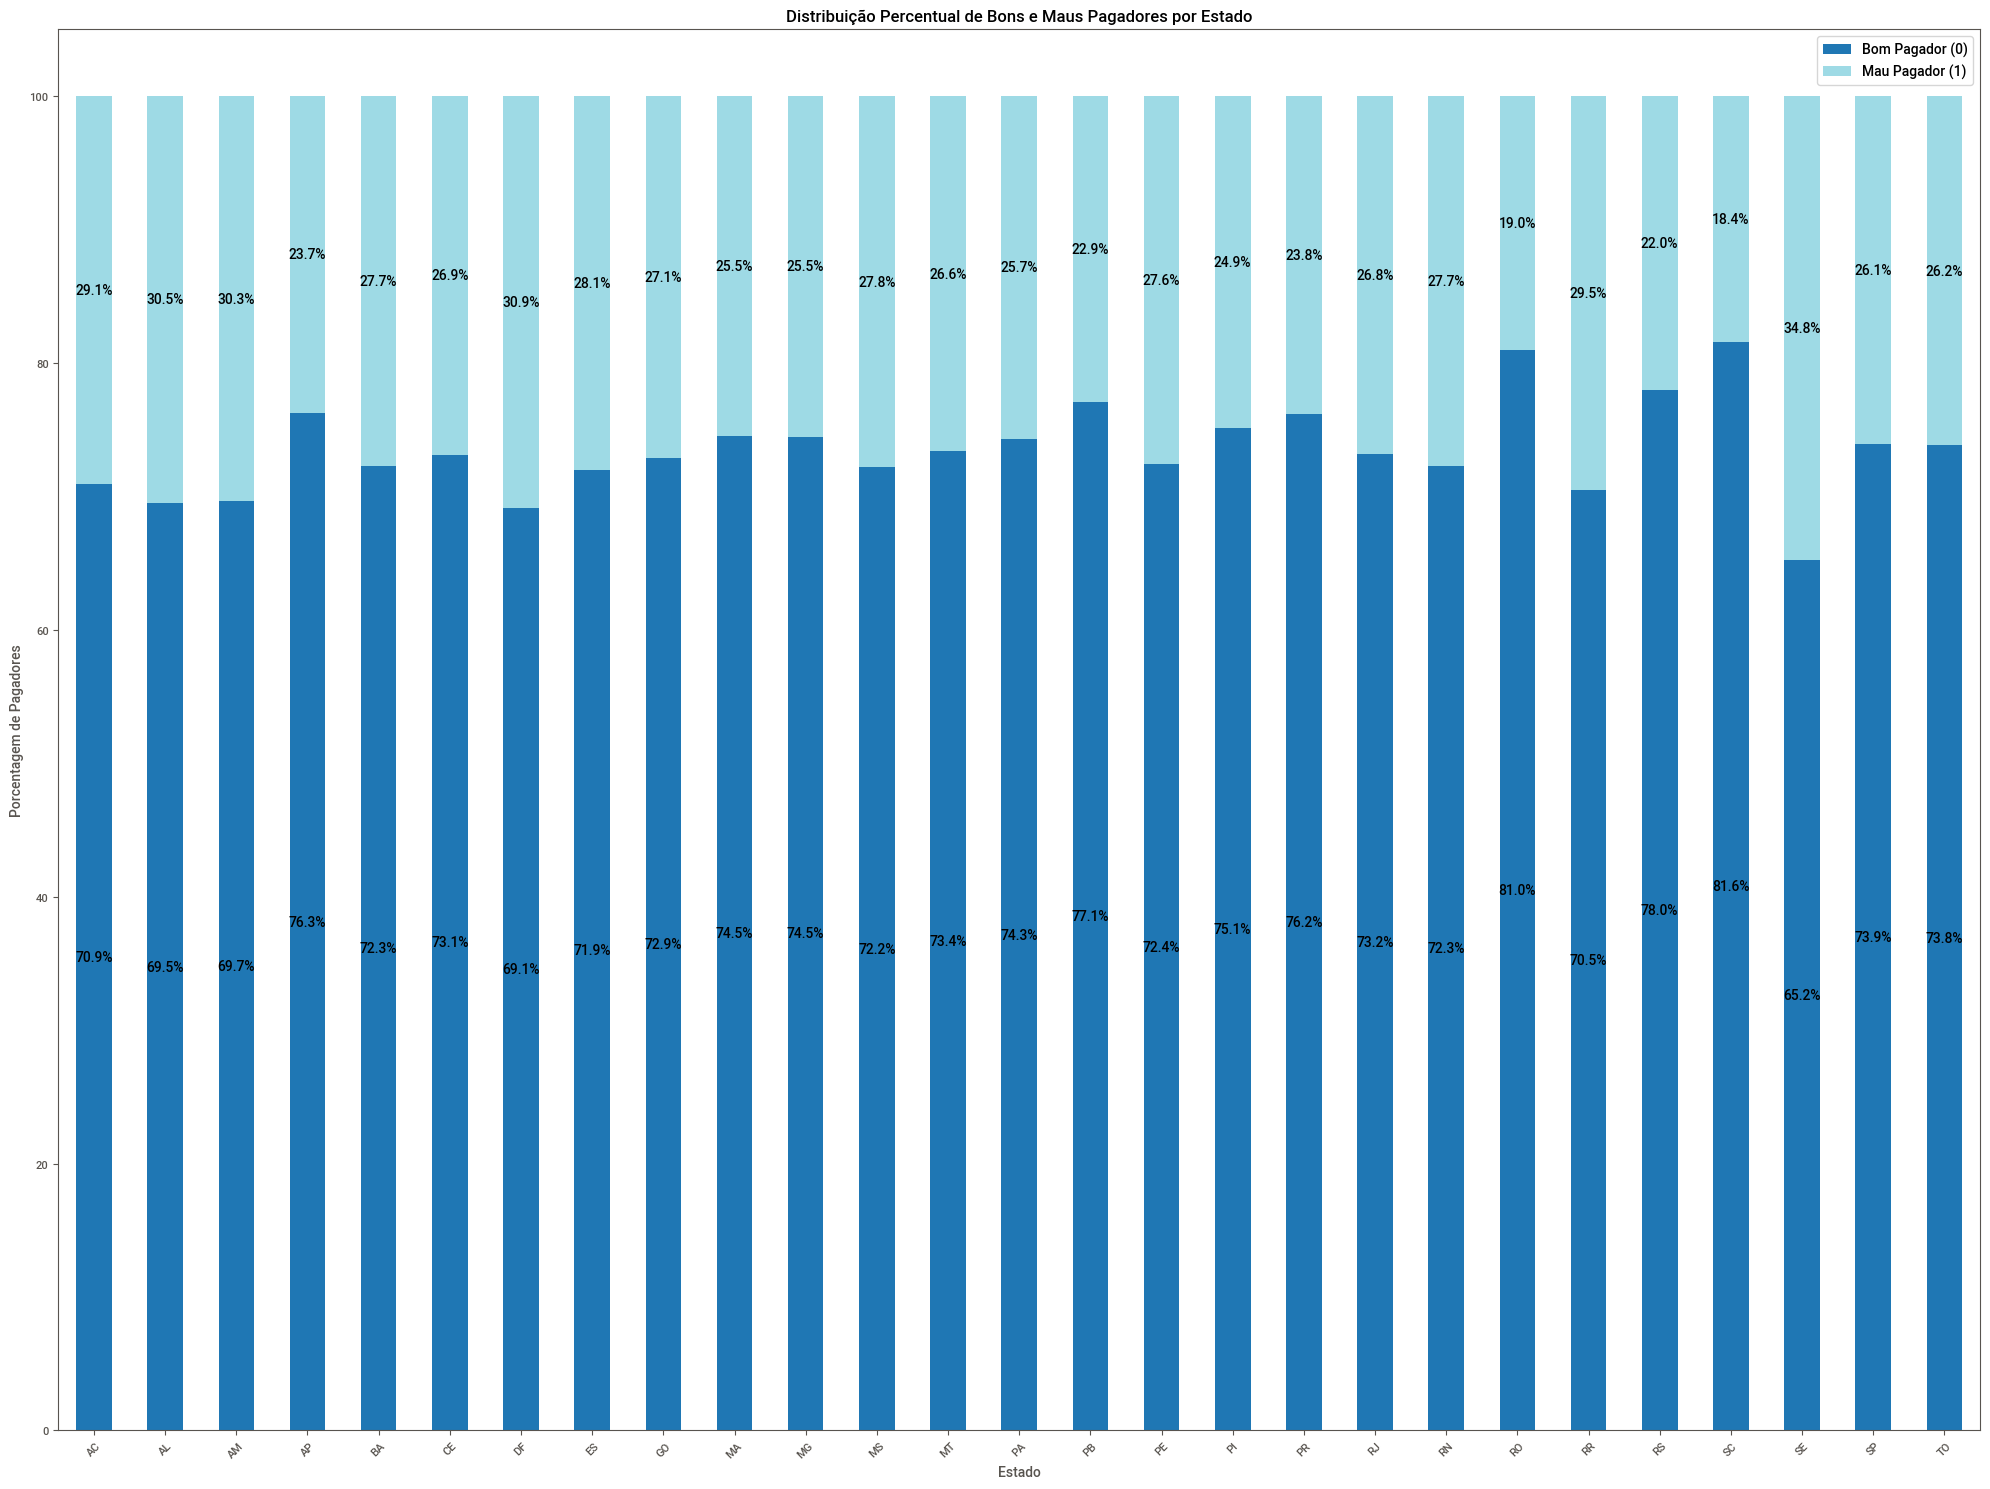

In [74]:

#2.2 Plote um gráfico que mostre a distribuição de bons e maus pagadores por estado. Escolha o gráfico que achar mais conveniente

estado_residencial = df[13]  # coluna 14 ESTADO_RESIDENCIAL
pagadores = df[53]           # coluna 54 4 ROTULO_ALVO_MAU=1 
data = pd.DataFrame({
    'State': estado_residencial,
    'Payer': pagadores
})

# Contagem de bons e maus pagadores por estado
total = data.groupby(['State', 'Payer']).size().unstack(fill_value=0)
ax = total.plot(kind='bar', stacked=True, figsize=(20, 15))
ind = np.arange(len(total))
bom = total[0]
mau = total[1]

for x, y, val in zip(ind, bom / 2, bom):
    plt.text(x, y, f"{val}", ha="center", va="center")

for x, y, val in zip(ind, bom + mau / 2, mau):
    plt.text(x, y, f"{val}", ha="center", va="center", color='white')

# gráfico com quantidade nas barras
plt.title('Distribuição de Bons e Maus Pagadores por Estado')
plt.xlabel('Estado')
plt.ylabel('Número de Pagadores')
plt.legend(['Bom Pagador (0)', 'Mau Pagador (1)'])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# gráfico com porcentagens
percent = total.div(total.sum(axis=1), axis=0) * 100
ax = percent.plot(kind='bar', stacked=True, figsize=(20, 15), colormap='tab20')
ind = np.arange(len(percent))
bom = percent[0]
mau = percent[1]

for x, y, val in zip(ind, bom / 2, bom):
    plt.text(x, y, f"{val:.1f}%", ha="center", va="center")

for x, y, val in zip(ind, bom + mau / 2, mau):
    plt.text(x, y, f"{val:.1f}%", ha="center", va="center", color='black')


plt.title('Distribuição Percentual de Bons e Maus Pagadores por Estado')
plt.xlabel('Estado')
plt.ylabel('Porcentagem de Pagadores')
plt.legend(['Bom Pagador (0)', 'Mau Pagador (1)'])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



# 2.3 Use boxplot para explicar como o tipo de residência interfere na classificação do pagador
RESPOSTA: O boxplot mostra que o tipo de residência não interfere na classificação do pagador, pois os dois tipos de residência têm distribuições semelhantes e não há diferença significativa entre as distribuições de pagadores para cada tipo de residência.


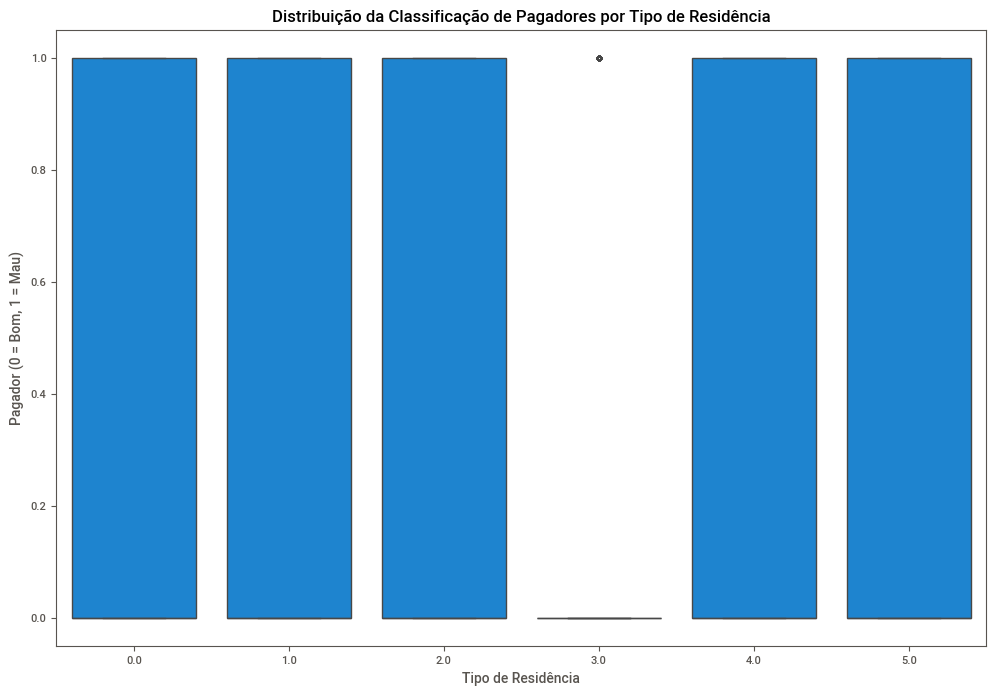

In [75]:

# 2.3 Use boxplot para explicar como o tipo de residência interfere na classificação do pagador

tipo_residencia = df[18]  # Coluna 19 TIPO_RESIDENCIA
pagadores = df[53]        # Coluna 54 (Bom = 0, Mau = 1)
dados = pd.DataFrame({
    'Tipo_Residencia': tipo_residencia,
    'Pagador': pagadores
})


# boxplot
plt.figure(figsize=(12, 8))
sns.boxplot(x='Tipo_Residencia', y='Pagador', data=dados)
plt.title('Distribuição da Classificação de Pagadores por Tipo de Residência')
plt.xlabel('Tipo de Residência')
plt.ylabel('Pagador (0 = Bom, 1 = Mau)')
plt.show()


# 2.4 Como as features renda pessoal mensal e outras rendas se relacionam com a variável meta? (obs: não é correlação estatística)
RESPOSTA: O gráfico mostra que a renda pessoal mensal tende a ser um pouco maior para bons pagadores, enquanto as outras rendas não apresentam diferença significativa entre as classificações. Em ambos os casos, a maioria dos clientes possui rendas baixas, com poucos outliers representando valores muito altos. A renda pessoal pode ser um indicador relevante, mas as outras rendas parecem não influenciar na distinção entre bons e maus pagadores.

   Renda_Pessoal  Outras_Rendas  Meta
0          900.0            0.0     1
1          750.0            0.0     1
2          500.0            0.0     0
3          500.0            0.0     0
4         1200.0            0.0     1


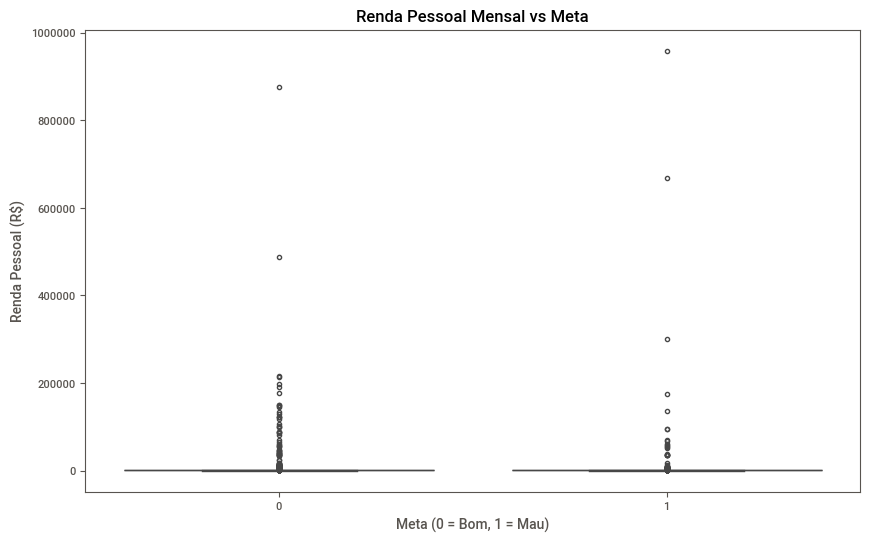

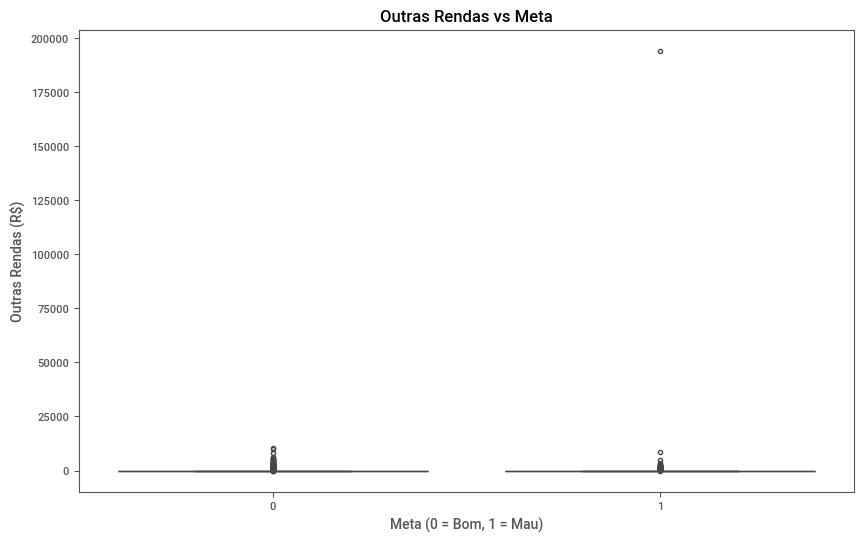

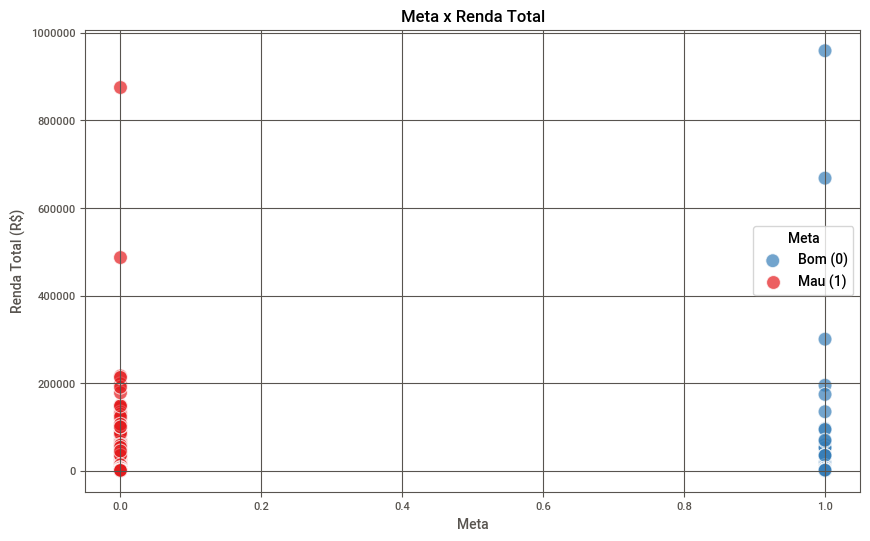

In [118]:
# 2.4 Como as features renda pessoal mensal e outras rendas se relacionam com a variável meta? (obs: não é correlação estatística)



renda_pessoal = df[22]       # Coluna 24 - Renda pessoal mensal
outras_rendas = df[23]       # Coluna 25 - Outras rendas
meta = df[53]                # Coluna 54 - Meta (Bom = 0, Mau = 1)

dados = pd.DataFrame({
    'Renda_Pessoal': renda_pessoal,
    'Outras_Rendas': outras_rendas,
    'Meta': meta
})

dados = dados.dropna()

print(dados.head())

# Renda Pessoal vs Meta
plt.figure(figsize=(10, 6))
sns.boxplot(x='Meta', y='Renda_Pessoal', data=dados)
plt.title('Renda Pessoal Mensal vs Meta')
plt.xlabel('Meta (0 = Bom, 1 = Mau)')
plt.ylabel('Renda Pessoal (R$)')
plt.show()

# Outras Rendas vs Meta
plt.figure(figsize=(10, 6))
sns.boxplot(x='Meta', y='Outras_Rendas', data=dados)
plt.title('Outras Rendas vs Meta')
plt.xlabel('Meta (0 = Bom, 1 = Mau)')
plt.ylabel('Outras Rendas (R$)')
plt.show()

# Renda Total vs Meta
dados['Renda_Total'] = dados['Renda_Pessoal'] + dados['Outras_Rendas']
plt.figure(figsize=(10, 6))
sns.scatterplot(data=dados, x='Meta', y='Renda_Total', hue='Meta', palette='Set1', s=100, alpha=0.7)
plt.title('Meta x Renda Total')
plt.xlabel('Meta')
plt.ylabel('Renda Total (R$)')
plt.legend(title='Meta', labels=['Bom (0)', 'Mau (1)'])
plt.grid(True)
plt.show()



# 2.5  A idade interfere na classificação do pagador?
RESPOSTA: Sim, a idade interfere na classificação do pagador: Jovens têm maior probabilidade de serem maus pagadores. A adimplência aumenta entre adultos e idosos, sugerindo que idade e experiência financeira podem ser fatores determinantes na capacidade de pagamento.


Bom Pagador (0):
- Idade média: 44,21 anos.
- Mediana: 43 anos.
- Faixa interquartil (25%-75%): 32 a 55 anos.

Mau Pagador (1):
- Idade média: 40,53 anos.
- Mediana: 38 anos.
- Faixa interquartil (25%-75%): 29 a 49 anos.



Jovens (abaixo de 30 anos):

- Proporcionalmente, a quantidade de maus pagadores é maior entre os jovens. Isso sugere que essa faixa etária apresenta maior risco de inadimplência, possivelmente devido à menor experiência financeira ou instabilidade econômica.

Adultos (30 a 60 anos):

- A maior concentração de bons pagadores está nesta faixa, indicando maior estabilidade financeira e capacidade de pagamento. Os maus pagadores também estão presentes, mas em menor proporção comparada aos jovens.

Idosos (acima de 60 anos):

- A frequência de clientes em geral diminui com a idade. Ainda assim, bons pagadores são mais frequentes entre os idosos do que maus pagadores, o que pode ser explicado por maior patrimônio acumulado ou despesas mais controladas.



/var/folders/1_/71tpy68j3wd3jq9yqnrw15wm0000gn/T/ipykernel_6673/1811767282.py:8: DtypeWarning: Columns (51,52) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("credit.csv", encoding='unicode_escape', sep='\t', header=None)


           count       mean        std  min   25%   50%   75%    max
Pagador                                                             
0        36959.0  44.209097  14.959259  6.0  32.0  43.0  55.0  106.0
1        13041.0  40.526187  14.737388  7.0  29.0  38.0  49.0  106.0


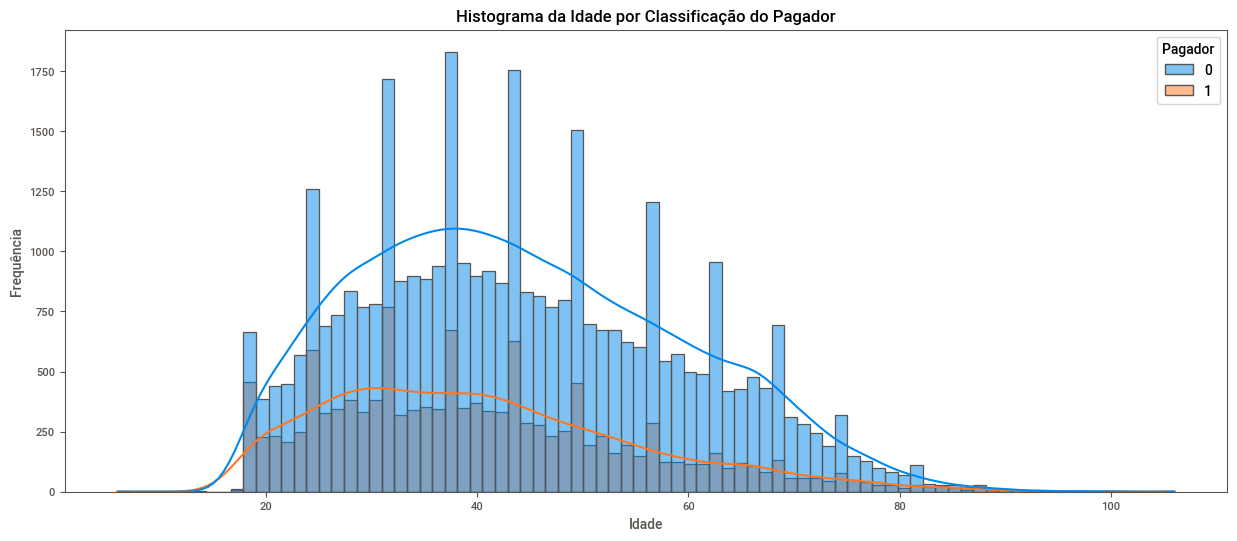

In [119]:
 #2.5  A idade interfere na classificação do pagador?

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


df = pd.read_csv("credit.csv", encoding='unicode_escape', sep='\t', header=None)
idade = df[50]  # Coluna 51 idade
pagador = df[53]   # Coluna meta (Bom = 0, Mau = 1)


dados = pd.DataFrame({
    'Idade': idade,
    'Pagador': pagador
})

dados = dados.dropna()

resumo = dados.groupby('Pagador')['Idade'].describe()
print(resumo)

# Histograma da idade por meta
plt.figure(figsize=(15, 6))
sns.histplot(data=dados, x='Idade', hue='Pagador', kde=True, element="bars")
plt.title('Histograma da Idade por Classificação do Pagador')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.show()



# Por fim, realizamos uma análise de correlação entre as variáveis que poderiam impactar a avaliação de crédito, com o objetivo de identificar se alguma delas apresenta uma relação significativa com a classificação do cliente como bom ou mau pagador.
- A matriz indica que as variáveis analisadas têm correlação fraca entre si, com exceção da relação negativa entre Idade e Meta, que sugere uma leve tendência de inadimplência entre clientes mais jovens.
- Não há uma variável isolada com alta correlação com Meta, o que sugere que a inadimplência pode ser influenciada por fatores combinados ou outras variáveis não incluídas nesta análise.

Estatísticas por Meta:
          Idade        Dependentes        Renda_Pessoal       
           mean median        mean median          mean median
Meta                                                          
0     44.209097   43.0    0.641900    0.0    873.553198  500.0
1     40.526187   38.0    0.674948    0.0    923.912488  500.0


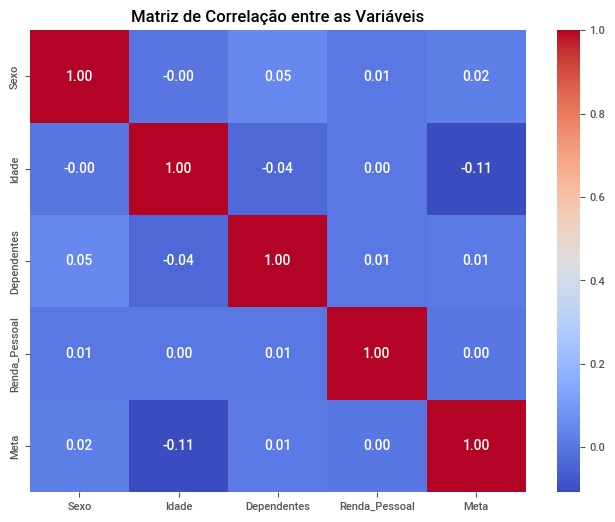

In [122]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Criando o DataFrame com as variáveis
sexo = df[6]           # Coluna 7 - Sexo
idade = df[50]          # Coluna 51 - Idade
dependentes = df[8]    # Coluna 9 - Quantidade de dependentes
Renda_Pessoal= df[22]   # Coluna 10 - Estado civil
meta = df[53]          # Coluna 54 - Meta (Bom = 0, Mau = 1)

dados = pd.DataFrame({
    'Sexo': sexo,
    'Idade': idade,
    'Dependentes': dependentes,
    'Renda_Pessoal': renda_pessoal,
    'Meta': meta
})

# Estatísticas descritivas por Meta
print("Estatísticas por Meta:")
print(dados.groupby('Meta').agg({'Idade': ['mean', 'median'], 'Dependentes': ['mean', 'median'], 'Renda_Pessoal': ['mean', 'median']}))


# Convertendo colunas categóricas para numéricas
dados_encoded = dados.copy()
dados_encoded['Sexo'] = dados_encoded['Sexo'].astype('category').cat.codes

# Matriz de Correlação
corr_matrix = dados_encoded.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Matriz de Correlação entre as Variáveis")
plt.show()

